#Linear Algebra

## 1.1 Graph vector $\vec{a}$ 

\begin{align}
\vec{a} = \begin{bmatrix} 3 \\ 2 \end{bmatrix}
\end{align}

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


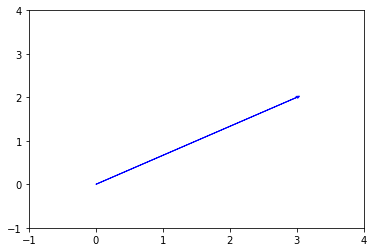

In [2]:
plt.arrow(0, 0, 3, 2, head_width=0.05, head_length=0.05, linestyle='-', color='b')
plt.xlim([-1,4])
plt.ylim([-1,4]);

## 1.2 Find $||\vec{b}||$. What does the norm of a vector represent?
\begin{align}
\vec{b} = \begin{bmatrix} 17 & -4 & -2 & 1\end{bmatrix}
\end{align}


In [3]:
# The norm of a vector represents its length, or "magnitude", 
#in `vector.len()` dimensional space.
np.linalg.norm(np.array([17,-4,-2,1]))

17.60681686165901

## 1.3 Find $\vec{c} \cdot \vec{d}$ - Are these vectors orthogonal? Why or why not?

\begin{align}
\vec{c} = \begin{bmatrix}3 & 7 & -2 & 12\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}9 & -7 & 4 & 6\end{bmatrix}
\end{align}

In [4]:
c = [3, 7, -2, 12]
d = [9, -7, 4, 6]

print(np.dot(c, d))

42


The vectors are not orthogonal because the dot product is >0. 

## 1.4 Find $E^{-1}$ and $E^{T}$

\begin{align}
E = 
\begin{bmatrix}
    7 & 4 & 2 \\
    1 & 3 & -1 \\
    2 & 6 & -4
\end{bmatrix}
\end{align}

In [5]:
e = np.array([[7, 4, 2],
    [1, 3, -1],
    [2, 6, -4]])
print("Inverse:\n\n", np.linalg.inv(e))
print("\nTranspose:\n\n", e.T)

Inverse:

 [[ 0.17647059 -0.82352941  0.29411765]
 [-0.05882353  0.94117647 -0.26470588]
 [ 0.          1.         -0.5       ]]

Transpose:

 [[ 7  1  2]
 [ 4  3  6]
 [ 2 -1 -4]]


# Intermediate Linear Algebra

## 2.1 Suppose that the number of customers at a ski resort as well as the number of inches of fresh powder (snow)  was recorded for 7 days. 

### Customers: [820, 760, 1250, 990, 1080, 1450, 1600]

### Inches of new snow: [0, 1, 7, 1, 0, 6, 4 ]

## Find the mean, variance, and standard deviation for both the number of customers and inches of new snow for the week. You may use library functions, dataframes, .describe(), etc. 



In [6]:
import pandas as pd

customers = [820, 760, 1250, 990, 1080, 1450, 1600]
snow = [0, 1, 7, 1, 0, 6, 4]

df = pd.DataFrame({'customers': customers, 'snow': snow})

df.head()

,customers,snow
0,820,0
1,760,1
2,1250,7
3,990,1
4,1080,0


In [7]:
print("Mean customers: ", df.customers.mean())
print("Mean snow ", df.snow.mean())
print("Standard deviation customers: ", df.customers.std())
print("Standard deviation snowfall: ", df.snow.std())
print("Variance customers: ", df.customers.var())
print("Variance snowfall: ", df.snow.var())

Mean customers:  1135.7142857142858
Mean snow  2.7142857142857144
Standard deviation customers:  314.26406851866597
Standard deviation snowfall:  2.9277002188455996
Variance customers:  98761.90476190478
Variance snowfall:  8.571428571428571


## 2.2 Are the variances of the number of customers and inches of snow comparable? 
## Why or why not? 

They are not comparable. the variance of customers for the given week is much more extreme than the variance of snow fall.

Because the number of customers is so much larger than number of inches of snow for this week, the variance for custumers will appear much larger than the variance in snowfall, which may skew the interpretation to seem that the distribution of customers is more spread out than that of snowfall.

## 2.3 Find the variance-covariance matrix for the number of customers and inches of snow at the ski resort. 

In [8]:
df.cov()

,customers,snow
customers,98761.904762,670.238095
snow,670.238095,8.571429


# PCA

## 3.1 Standardize the data so that it has a mean of 0 and a standard deviation of 1. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing the data or PCA.

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html>

In [9]:
# Let me get you some data to start you off.
import pandas as pd

data = {"Country": ["England","Wales","Scotland","North Ireland"], 
        "Cheese": [105,103,103,66], 
        "Carcass_Meat": [245,227,242,267], 
        "Other_Meat": [685, 803, 750, 586], 
        "Fish": [147, 160, 122, 93], 
        "Fats_and_Oils": [193, 235, 184, 209], 
        "Sugars": [156, 175, 147, 139], 
        "Fresh_Potatoes": [720, 874, 566, 1033], 
        "Fresh_Veg": [253, 265, 171, 143], 
        "Other_Veg": [488, 570, 418, 355], 
        "Processed_Potatoes": [198, 203, 220, 187], 
        "Processed_Veg": [360, 365, 337, 334], 
        "Fresh_Fruit": [1102, 1137, 957, 674], 
        "Cereals": [1472, 1582, 1462, 1494], 
        "Beverages": [57,73,53,47], 
        "Soft_Drinks": [1374, 1256, 1572, 1506], 
        "Alcoholic Drinks": [375, 475, 458, 135], 
        "Confectionery": [54, 64, 62, 41]}

df = pd.DataFrame(data)

# Look at the data
df.head()

,Country,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
1,Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
2,Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
3,North Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


In [10]:
# Standardize data mean
df = df.drop(columns='Country')
df = df - df.mean()
df.describe()

,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
count,4.000000,4.00,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,0.000000,0.00,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
std,18.856917,16.50,93.427334,29.557853,22.366269,15.47848,200.755863,60.188592,92.471167,13.735599,15.769168,210.612599,54.659552,11.120552,140.612944,156.712848,10.436315
min,-28.250000,-18.25,-120.000000,-37.500000,-21.250000,-15.25000,-232.250000,-65.000000,-102.750000,-15.000000,-15.000000,-293.500000,-40.500000,-10.500000,-171.000000,-225.750000,-14.250000
25%,-0.500000,-7.00,-45.750000,-15.750000,-14.500000,-9.25000,-116.750000,-44.000000,-55.500000,-6.750000,-12.750000,-81.250000,-33.000000,-6.000000,-82.500000,-45.750000,-4.500000
50%,8.750000,-1.75,11.500000,4.000000,-4.250000,-2.75000,-1.250000,4.000000,-4.750000,-1.500000,-0.500000,62.000000,-19.500000,-2.500000,13.000000,55.750000,2.750000
75%,9.250000,5.25,57.250000,19.750000,10.250000,6.50000,115.500000,48.000000,50.750000,5.250000,12.250000,143.250000,13.500000,3.500000,95.500000,101.500000,7.250000
max,10.750000,21.75,97.000000,29.500000,29.750000,20.75000,234.750000,57.000000,112.250000,18.000000,16.000000,169.500000,79.500000,15.500000,145.000000,114.250000,8.750000


In [11]:
# Standardize data standard deviation
df = df / df.std()
df.describe()

,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
count,4.000000,4.000000,4.000000e+00,4.000000,4.000000e+00,4.000000,4.000000,4.000000e+00,4.000000,4.000000,4.000000e+00,4.000000,4.000000e+00,4.000000e+00,4.000000e+00,4.000000,4.000000
mean,0.000000,0.000000,-5.551115e-17,0.000000,1.387779e-17,0.000000,0.000000,5.551115e-17,0.000000,0.000000,2.775558e-17,0.000000,-1.387779e-17,5.551115e-17,-2.775558e-17,0.000000,0.000000
std,1.000000,1.000000,1.000000e+00,1.000000,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000
min,-1.498124,-1.106061,-1.284421e+00,-1.268698,-9.500914e-01,-0.985239,-1.156878,-1.079939e+00,-1.111157,-1.092053,-9.512233e-01,-1.393554,-7.409501e-01,-9.441978e-01,-1.216104e+00,-1.440533,-1.365425
25%,-0.026515,-0.424242,-4.896854e-01,-0.532853,-6.482977e-01,-0.597604,-0.581552,-7.310355e-01,-0.600187,-0.491424,-8.085398e-01,-0.385779,-6.037371e-01,-5.395416e-01,-5.867170e-01,-0.291935,-0.431187
50%,0.464021,-0.106061,1.230903e-01,0.135328,-1.900183e-01,-0.177666,-0.006226,6.645778e-02,-0.051367,-0.109205,-3.170744e-02,0.294379,-3.567537e-01,-2.248090e-01,9.245237e-02,0.355746,0.263503
75%,0.490536,0.318182,6.127757e-01,0.668181,4.582794e-01,0.419938,0.575326,7.974933e-01,0.548820,0.382219,7.768323e-01,0.680159,2.469834e-01,3.147326e-01,6.791693e-01,0.647681,0.694690
max,0.570083,1.318182,1.038240e+00,0.998043,1.330128e+00,1.340571,1.169331,9.470233e-01,1.213892,1.310463,1.014638e+00,0.804795,1.454458e+00,1.393816e+00,1.031200e+00,0.729040,0.838419


## 3.2 Perform PCA on the data and graph Principal Component 1 against Principal Component 2. (You may use library functions)

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html>

In [12]:
pca = PCA(2)
pca.fit(df)
projected_df = pca.transform(df)

projected_df = pd.DataFrame(data=projected_df, columns=['PC1', 'PC2'])
projected_df


,PC1,PC2
0,-0.826612,0.284332
1,-3.915258,-1.502883
2,0.422602,2.800442
3,4.319269,-1.581891


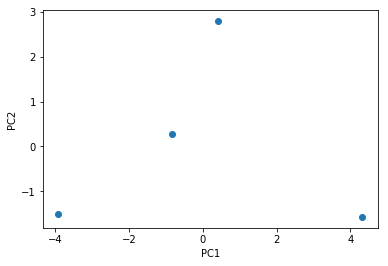

In [13]:
plt.scatter(x=projected_df['PC1'], y=projected_df['PC2'])
plt.xlabel('PC1')
plt.ylabel('PC2');

# Clustering

## 4.1 Use K-Means to cluster the following data and then graph your results. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing clustering.

Prioritize calculating the clusters over graphing them. 

Scikit-Learn K-Means Documentation:

<https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html>

In [14]:
points = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/points.csv')
points.head()

,x,y
0,-7.846803,-3.421277
1,-3.554323,-6.884729
2,-0.192822,-9.671030
3,-6.401456,-5.223972
4,-0.804026,-9.704457


In [15]:
# Initialize, Fit, Transform
scaler = StandardScaler(with_mean=True, with_std=True)
scaler.fit(points)
projected_points = scaler.transform(points)

projected_points = pd.DataFrame(data=projected_points)
projected_points.head()

,0,1
0,-1.215264,0.000286
1,-0.270846,-0.621863
2,0.468740,-1.122373
3,-0.897263,-0.323537
4,0.334265,-1.128378


In [16]:
# Perform PCA on Standardized Data
pca = PCA(2)
pca.fit(projected_points)
projected_points_df = pd.DataFrame(pca.transform(projected_points), columns=['PC1', 'PC2'])
projected_points_df.head()

,PC1,PC2
0,-0.859119,-0.859524
1,-0.631241,0.248206
2,-0.462188,1.125087
3,-0.863236,-0.405686
4,-0.561522,1.034245


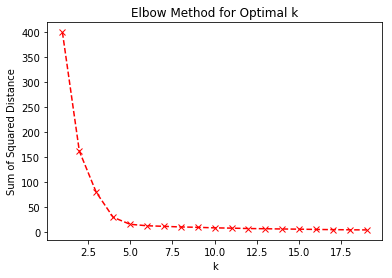

In [17]:
# Use Elbow Method
sum_of_squared_distances = []
for k in range(1,20):
    km = KMeans(n_clusters=k)
    km = km.fit(projected_points)
    sum_of_squared_distances.append(km.inertia_)

plt.plot(range(1,20), sum_of_squared_distances, 'rx--')
plt.xlabel('k')
plt.ylabel('Sum of Squared Distance')
plt.title('Elbow Method for Optimal k')
plt.show();

In [18]:
# Fit k-Means and append cluster values to projected_points DataFrame for graphing
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=500, n_jobs=4).fit(projected_points_df)
projected_points_df['cluster'] = pd.Series(kmeans.labels_).values
projected_points_df.head()

,PC1,PC2,cluster
0,-0.859119,-0.859524,3
1,-0.631241,0.248206,0
2,-0.462188,1.125087,0
3,-0.863236,-0.405686,3
4,-0.561522,1.034245,0


In [20]:
projected_points_df['cluster_center'] = list(kmeans.cluster_centers_[projected_points_df['cluster'] - 1])

# Append distance between points and their clusters
a = projected_points_df[['PC1', 'PC2']].values
b = projected_points_df['cluster_center']

# Normalize distances for seaborn hue parameter
projected_points_df['dist_from_cluster'] = [plt.mlab.dist(x, y)/len(a) for x,y in zip(a, b)]

projected_points_df.head()

C:\Users\Kevona Jean\myCODE\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: numpy.hypot
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Kevona Jean\myCODE\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: numpy.hypot
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Kevona Jean\myCODE\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: numpy.hypot
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Kevona Jean\myCODE\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: numpy.hypot
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Kevona Jean\myCODE\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: numpy.hypot
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Kevona Jean\myCODE\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: numpy.hypot
  # This is added back by 

,PC1,PC2,cluster,cluster_center,dist_from_cluster
0,-0.859119,-0.859524,3,"[2.256868085017383, 0.4106556639679038]",0.016825
1,-0.631241,0.248206,0,"[-0.9642497046046881, -0.9161063354610136]",0.006055
2,-0.462188,1.125087,0,"[-0.9642497046046881, -0.9161063354610136]",0.010510
3,-0.863236,-0.405686,3,"[2.256868085017383, 0.4106556639679038]",0.016126
4,-0.561522,1.034245,0,"[-0.9642497046046881, -0.9161063354610136]",0.009957


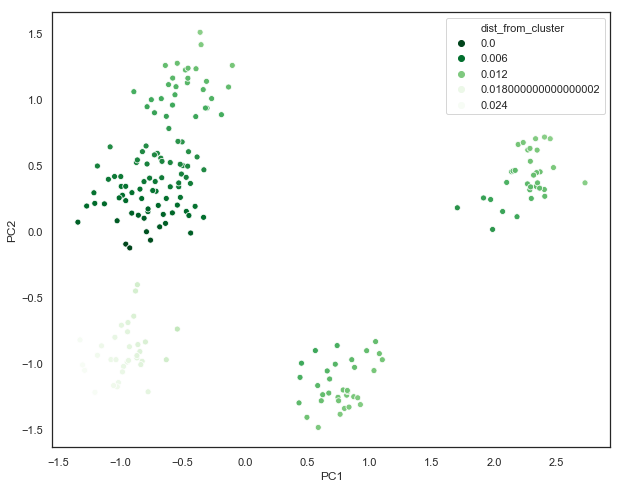

In [21]:
sns.set(rc={'figure.figsize':(10, 8)})
sns.set_context('notebook')
sns.set_style('white')
sns.scatterplot(data=projected_points_df, x='PC1', y='PC2', hue='dist_from_cluster', palette='Greens_r');